In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [30]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [31]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
df.shape

(200, 5)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [34]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [35]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [36]:
df.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [37]:
df.value_counts()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
1           Male    19   15                  39                        1
138         Male    32   73                  73                        1
128         Male    40   71                  95                        1
129         Male    59   71                  11                        1
130         Male    38   71                  75                        1
                                                                      ..
70          Female  32   48                  47                        1
71          Male    70   49                  55                        1
72          Female  47   49                  42                        1
73          Female  60   50                  49                        1
200         Male    30   137                 83                        1
Length: 200, dtype: int64

In [38]:
X  = df.iloc[:,[3,4]].values

In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

In [44]:
print(wcss)

[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30259.65720728547, 25011.839349156588, 21862.092672182895, 19672.072849014323]


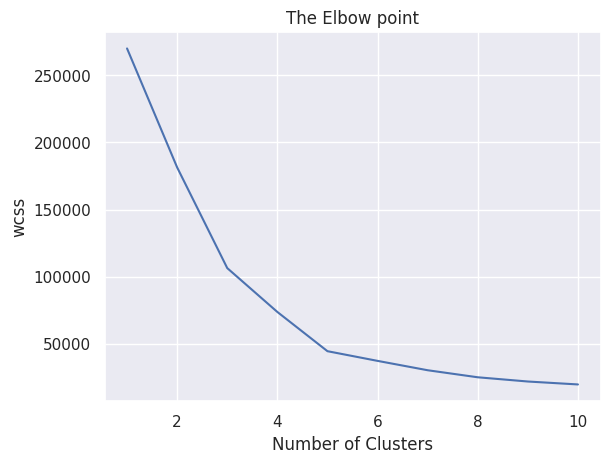

In [45]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow point')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [46]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)


Y = kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


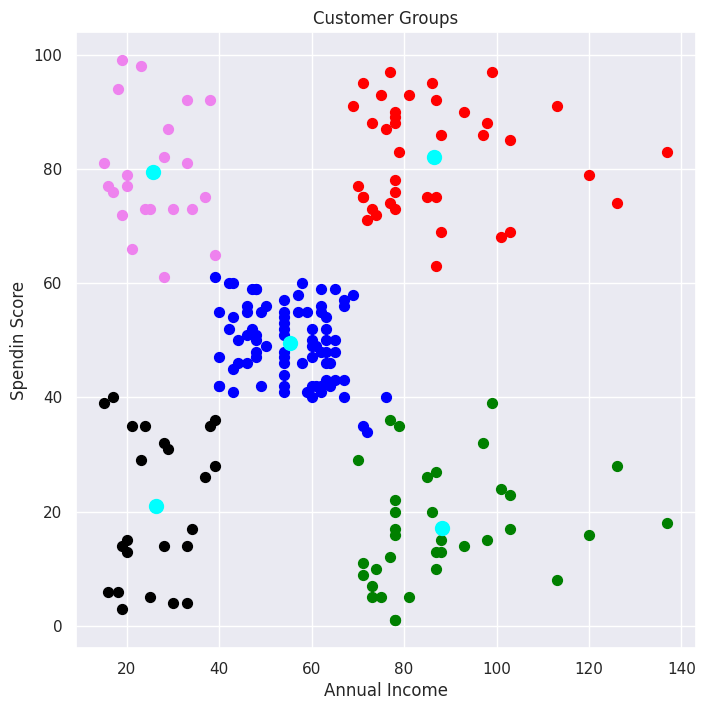

In [53]:
plt.figure(figsize=(8,8))
# plot the all clusters.
plt.scatter(X[Y==0,0], X[Y==0,1],s=50, c='green',label='cluster 1' )
plt.scatter(X[Y==1,0], X[Y==1,1],s=50, c='blue',label='cluster 2' )
plt.scatter(X[Y==2,0], X[Y==2,1],s=50, c='red',label='cluster 3' )
plt.scatter(X[Y==3,0], X[Y==3,1],s=50, c='violet',label='cluster 4' )
plt.scatter(X[Y==4,0], X[Y==4,1],s=50, c='black',label='cluster 5' )

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label = 'Centroids')


plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spendin Score')

plt.show()